In [1]:
%pylab inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import numpy.random as rng
import pandas.io.data as web
import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def get_prices(symbol):
    start, end = '2007-05-02', '2016-04-11'
    data = web.DataReader(symbol, 'yahoo', start, end)
    data=pd.DataFrame(data)
    prices=data['Adj Close']
    #prices=np.asarray(list(prices))
    prices=prices.astype(float)
    return prices

def get_returns(prices):
    return (prices-prices.shift(-1))/prices

def sort_data(rets):
    ins = []
    outs = []
    for i in range(len(rets)-100):
        ins.append(rets[i:i+100].tolist())
        outs.append(rets[i+100])
    return np.array(ins), np.array(outs)

In [3]:
# separate data into inputs and outputs for training and testing
gs = get_prices('GS')
rets = get_returns(gs)
ins, outs = sort_data(rets)
div = int(.8 * ins.shape[0])
train_ins, train_outs = ins[:div], outs[:div]
test_ins, test_outs = ins[div:], outs[div:]

In [46]:
sess = tf.InteractiveSession()

In [47]:
# we define two placeholders for our input and output
x = tf.placeholder(tf.float32, [None, 100])
y_ = tf.placeholder(tf.float32, [None, 1])

# we define trainable variables for our model
W = tf.Variable(tf.random_normal([100, 1]))
b = tf.Variable(tf.random_normal([1]))

# we define our model: y = W*x + b
y = tf.matmul(x, W) + b

#MSE:
cost = tf.reduce_sum(tf.pow(y-y_, 2))/(2*1000)
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(cost)

In [60]:
# initialize variables to random values
init = tf.initialize_all_variables()
sess.run(init)
# run optimizer on entire training data set many times
for epoch in range(20000):
    sess.run(optimizer, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
    # every 1000 iterations record progress
    if (epoch+1)%1000== 0:
        c = sess.run(cost, feed_dict={x: train_ins, y_: train_outs.reshape(1,-1).T})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

Epoch: 1000 cost= 0.019055584
Epoch: 2000 cost= 0.005943393
Epoch: 3000 cost= 0.002348902
Epoch: 4000 cost= 0.001233126
Epoch: 5000 cost= 0.000856721
Epoch: 6000 cost= 0.000721102
Epoch: 7000 cost= 0.000669394
Epoch: 8000 cost= 0.000648663
Epoch: 9000 cost= 0.000639970
Epoch: 10000 cost= 0.000636177
Epoch: 11000 cost= 0.000634464
Epoch: 12000 cost= 0.000633667
Epoch: 13000 cost= 0.000633285
Epoch: 14000 cost= 0.000633100
Epoch: 15000 cost= 0.000633007
Epoch: 16000 cost= 0.000632960
Epoch: 17000 cost= 0.000632936
Epoch: 18000 cost= 0.000632923
Epoch: 19000 cost= 0.000632917
Epoch: 20000 cost= 0.000632913


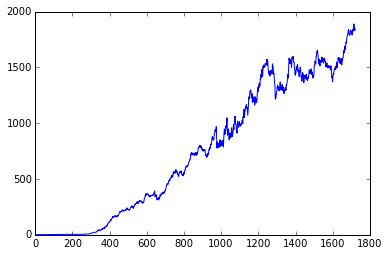

In [61]:
#train results :)
predict = y
p = sess.run(predict, feed_dict={x: train_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * train_outs
plot(np.cumprod(returns+1))

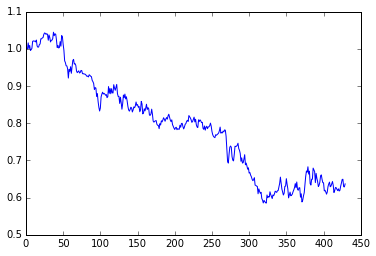

In [62]:
#test results :(
predict = y
p = sess.run(predict, feed_dict={x: test_ins})
position = 2*((p>0)-.5)
returns= position.reshape(-1) * test_outs
plot(np.cumprod(returns+1))